In [16]:
import pandas as pd
import seaborn as sns
from LinearRegression import Neuron
import random
from matplotlib import pyplot as plt

# cria o dataset
df = pd.read_csv('dados/Pokemon.csv')
display(df)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


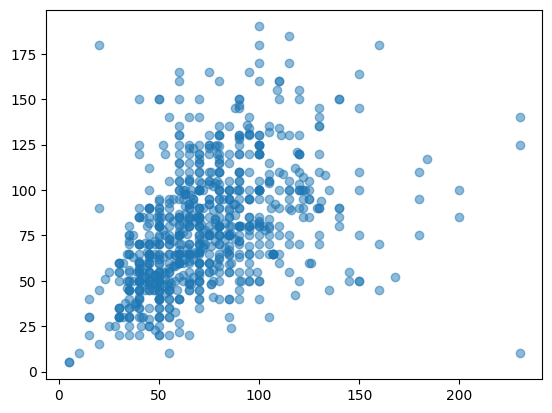

In [17]:
plt.scatter(x=df['Defense'], y=df['Attack'], alpha=0.5)

In [18]:
# normalização dos dados
df['Defense'] = (df['Defense'] - df['Defense'].min()) / (df['Defense'].max() - df['Defense'].min())
df['Attack'] = (df['Attack'] - df['Attack'].min()) / (df['Attack'].max() - df['Attack'].min())


# separação do conjunto de dados
X_train = list(df['Defense'][:640])
X_test = list(df['Defense'][640:])

y_train = list(df['Attack'][:640])
y_test = list(df['Attack'][650:])


N = 640

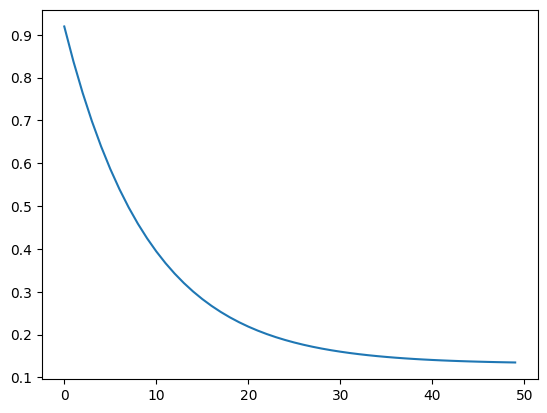

In [19]:
# instancia o objeto neurônio
perceptron = Neuron(w=1, b=1, lr=0.1, N=N)

# lista que irá acumular os erros ao logo das épocas
errors = []

# treinamento em 50 épocas
for epoch in range(50):
    for i in range(N):
        x, y = X_train[i], y_train[i]

        # faz o forward
        perceptron.forward(x)

        # calcula o erro
        perceptron.MSE(y)

        # faz o backward
        perceptron.backward()
    
    # faz append dos erros
    errors.append(perceptron.error)

# faz o plot do grafico de erro
plt.plot(errors)
plt.show()
        

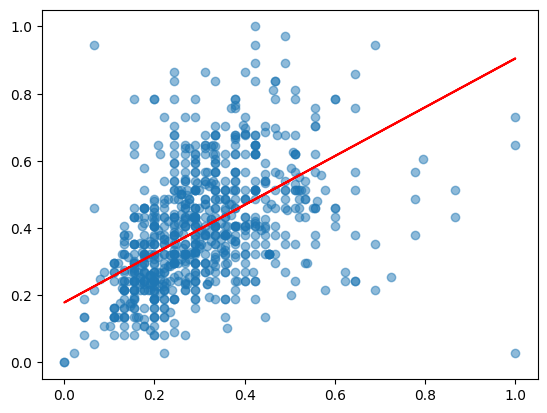

In [20]:
w = perceptron.w
b = perceptron.b

plt.plot(df['Defense'], (df['Defense'] * w + b), color='red')
plt.scatter(x=df['Defense'], y=df['Attack'], alpha=0.5)
plt.show()

In [21]:
x = int(input('Digite uma defesa: '))
print(f'O ataque estimado para {x} é {round(w * x + b)}.')

O ataque estimado para 100 é 73.


In [25]:
df['Defense'].unique()

array([0.19555556, 0.25777778, 0.34666667, 0.52444444, 0.16888889,
       0.23555556, 0.32444444, 0.47111111, 0.26666667, 0.33333333,
       0.42222222, 0.51111111, 0.13333333, 0.22222222, 0.2       ,
       0.11111111, 0.15555556, 0.31111111, 0.24444444, 0.17333333,
       0.28444444, 0.35555556, 0.46666667, 0.20888889, 0.27555556,
       0.36444444, 0.23111111, 0.32      , 0.19111111, 0.30222222,
       0.06666667, 0.17777778, 0.28888889, 0.08888889, 0.4       ,
       0.04444444, 0.48888889, 0.55555556, 0.77777778, 0.68888889,
       0.37777778, 0.21333333, 0.32888889, 0.        , 0.46222222,
       0.53333333, 0.44444444, 0.26222222, 0.12888889, 0.14666667,
       0.10222222, 0.16444444, 0.6       , 0.86666667, 1.        ,
       0.25333333, 0.14222222, 0.02222222, 0.64444444, 0.16      ,
       0.24888889, 0.12      , 0.08      , 0.57777778, 0.40888889,
       0.29333333, 0.28      , 0.36888889, 0.20444444, 0.50222222,
       0.72444444, 0.43111111, 0.27111111, 0.35111111, 0.39555